# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

#helper.download_extract('mnist', data_dir)
#helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

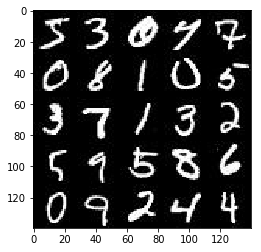

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

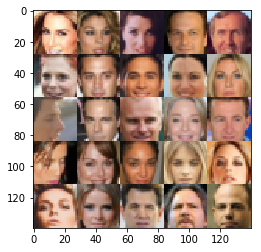

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Users\betul\Anaconda3\envs\dog-project\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_img=tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="input_image")
    input_z=tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate=tf.placeholder(tf.float32, name="learning_rate")
    return input_img, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        x1=tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1=tf.maximum(alpha*x1,x1)
        
        x2=tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2=tf.layers.batch_normalization(x2, training=True)
        relu2=tf.maximum(alpha*bn2,bn2)
    
        x3=tf.layers.conv2d(relu2, 256, 5,strides=2, padding='same')
        bn3=tf.layers.batch_normalization(x3, training=True)
        relu3=tf.maximum(alpha*bn3,bn3)
        
        flat=tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 4*4*512)
        
        x1 = tf.reshape(x1, (-1, 4,4,512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        out = tf.tanh(logits)
        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss_total = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss_total = d_loss_real + d_loss_fake

    return d_loss_total, g_loss_total



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    steps=0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images*2
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr:learning_rate})

                # Get the losses
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})
            
                #print the loseses
            
                    print("Step: {}...".format(steps),
                          "Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator loss: {:.4f}...".format(train_loss_d),
                          "Generator loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Step: 10... Epoch 1/2... Discriminator loss: 0.7340... Generator loss: 2.1755
Step: 20... Epoch 1/2... Discriminator loss: 0.6218... Generator loss: 1.5711
Step: 30... Epoch 1/2... Discriminator loss: 0.4239... Generator loss: 3.0529
Step: 40... Epoch 1/2... Discriminator loss: 0.7586... Generator loss: 5.0673
Step: 50... Epoch 1/2... Discriminator loss: 0.9491... Generator loss: 7.5064
Step: 60... Epoch 1/2... Discriminator loss: 0.5426... Generator loss: 10.4350
Step: 70... Epoch 1/2... Discriminator loss: 0.7980... Generator loss: 1.3188
Step: 80... Epoch 1/2... Discriminator loss: 0.6052... Generator loss: 1.9724
Step: 90... Epoch 1/2... Discriminator loss: 0.5301... Generator loss: 7.5489
Step: 100... Epoch 1/2... Discriminator loss: 0.8178... Generator loss: 1.2240


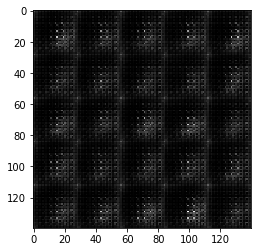

Step: 110... Epoch 1/2... Discriminator loss: 0.5251... Generator loss: 2.0244
Step: 120... Epoch 1/2... Discriminator loss: 0.5170... Generator loss: 2.3302
Step: 130... Epoch 1/2... Discriminator loss: 0.4985... Generator loss: 3.0430
Step: 140... Epoch 1/2... Discriminator loss: 0.4877... Generator loss: 2.6326
Step: 150... Epoch 1/2... Discriminator loss: 0.5562... Generator loss: 3.3093
Step: 160... Epoch 1/2... Discriminator loss: 0.6232... Generator loss: 2.3923
Step: 170... Epoch 1/2... Discriminator loss: 0.6997... Generator loss: 1.7497
Step: 180... Epoch 1/2... Discriminator loss: 0.6966... Generator loss: 1.9470
Step: 190... Epoch 1/2... Discriminator loss: 0.8145... Generator loss: 2.0254
Step: 200... Epoch 1/2... Discriminator loss: 0.7156... Generator loss: 3.0912


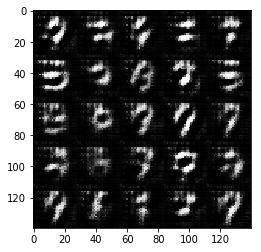

Step: 210... Epoch 1/2... Discriminator loss: 0.6667... Generator loss: 2.3020
Step: 220... Epoch 1/2... Discriminator loss: 0.9773... Generator loss: 1.2237
Step: 230... Epoch 1/2... Discriminator loss: 1.1147... Generator loss: 2.3600
Step: 240... Epoch 1/2... Discriminator loss: 1.0389... Generator loss: 0.9959
Step: 250... Epoch 1/2... Discriminator loss: 0.9777... Generator loss: 1.5922
Step: 260... Epoch 1/2... Discriminator loss: 0.6871... Generator loss: 2.3731
Step: 270... Epoch 1/2... Discriminator loss: 0.7367... Generator loss: 1.9463
Step: 280... Epoch 1/2... Discriminator loss: 1.1269... Generator loss: 0.8184
Step: 290... Epoch 1/2... Discriminator loss: 0.7498... Generator loss: 1.6465
Step: 300... Epoch 1/2... Discriminator loss: 1.0108... Generator loss: 2.3011


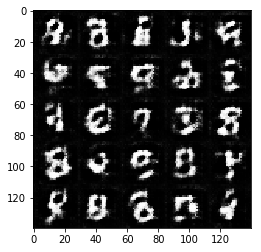

Step: 310... Epoch 1/2... Discriminator loss: 0.8779... Generator loss: 1.3563
Step: 320... Epoch 1/2... Discriminator loss: 0.9793... Generator loss: 1.1316
Step: 330... Epoch 1/2... Discriminator loss: 0.8762... Generator loss: 1.3510
Step: 340... Epoch 1/2... Discriminator loss: 0.8837... Generator loss: 1.4294
Step: 350... Epoch 1/2... Discriminator loss: 1.3116... Generator loss: 2.1067
Step: 360... Epoch 1/2... Discriminator loss: 0.9398... Generator loss: 1.0323
Step: 370... Epoch 1/2... Discriminator loss: 0.8632... Generator loss: 1.2964
Step: 380... Epoch 1/2... Discriminator loss: 0.7491... Generator loss: 1.7111
Step: 390... Epoch 1/2... Discriminator loss: 1.1616... Generator loss: 0.9173
Step: 400... Epoch 1/2... Discriminator loss: 1.1469... Generator loss: 0.7914


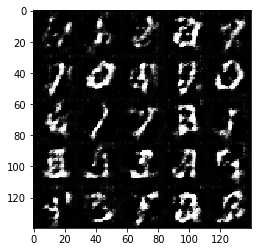

Step: 410... Epoch 1/2... Discriminator loss: 0.7765... Generator loss: 1.3977
Step: 420... Epoch 1/2... Discriminator loss: 0.8357... Generator loss: 1.8950
Step: 430... Epoch 1/2... Discriminator loss: 0.7943... Generator loss: 1.5493
Step: 440... Epoch 1/2... Discriminator loss: 0.9096... Generator loss: 0.9834
Step: 450... Epoch 1/2... Discriminator loss: 0.7866... Generator loss: 1.7986
Step: 460... Epoch 1/2... Discriminator loss: 0.9585... Generator loss: 0.9497
Step: 470... Epoch 1/2... Discriminator loss: 0.8612... Generator loss: 1.1635
Step: 480... Epoch 1/2... Discriminator loss: 0.8371... Generator loss: 1.5619
Step: 490... Epoch 1/2... Discriminator loss: 0.9621... Generator loss: 2.0572
Step: 500... Epoch 1/2... Discriminator loss: 0.8506... Generator loss: 1.1844


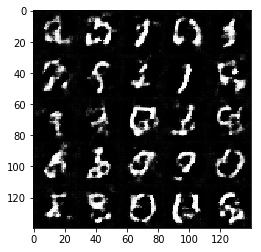

Step: 510... Epoch 1/2... Discriminator loss: 1.2114... Generator loss: 2.4680
Step: 520... Epoch 1/2... Discriminator loss: 0.9883... Generator loss: 0.9848
Step: 530... Epoch 1/2... Discriminator loss: 1.0157... Generator loss: 2.3879
Step: 540... Epoch 1/2... Discriminator loss: 0.7634... Generator loss: 1.3663
Step: 550... Epoch 1/2... Discriminator loss: 0.8286... Generator loss: 1.9019
Step: 560... Epoch 1/2... Discriminator loss: 1.0679... Generator loss: 0.8990
Step: 570... Epoch 1/2... Discriminator loss: 1.1759... Generator loss: 0.6979
Step: 580... Epoch 1/2... Discriminator loss: 0.8534... Generator loss: 1.1972
Step: 590... Epoch 1/2... Discriminator loss: 0.7713... Generator loss: 1.3698
Step: 600... Epoch 1/2... Discriminator loss: 0.9048... Generator loss: 2.2521


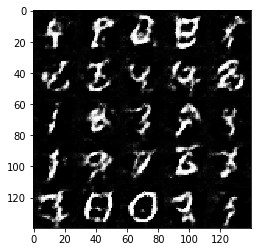

Step: 610... Epoch 1/2... Discriminator loss: 0.9619... Generator loss: 0.9666
Step: 620... Epoch 1/2... Discriminator loss: 1.0086... Generator loss: 1.9468
Step: 630... Epoch 1/2... Discriminator loss: 0.9250... Generator loss: 1.0614
Step: 640... Epoch 1/2... Discriminator loss: 1.0605... Generator loss: 0.8206
Step: 650... Epoch 1/2... Discriminator loss: 0.8702... Generator loss: 1.1856
Step: 660... Epoch 1/2... Discriminator loss: 0.9348... Generator loss: 1.1114
Step: 670... Epoch 1/2... Discriminator loss: 0.8990... Generator loss: 1.0953
Step: 680... Epoch 1/2... Discriminator loss: 1.1737... Generator loss: 0.7388
Step: 690... Epoch 1/2... Discriminator loss: 0.7819... Generator loss: 1.3234
Step: 700... Epoch 1/2... Discriminator loss: 0.8338... Generator loss: 1.5336


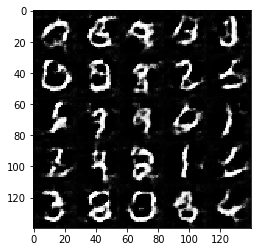

Step: 710... Epoch 1/2... Discriminator loss: 1.4794... Generator loss: 0.5691
Step: 720... Epoch 1/2... Discriminator loss: 0.8317... Generator loss: 1.3291
Step: 730... Epoch 1/2... Discriminator loss: 1.0393... Generator loss: 0.8197
Step: 740... Epoch 1/2... Discriminator loss: 0.7703... Generator loss: 2.1127
Step: 750... Epoch 1/2... Discriminator loss: 0.8295... Generator loss: 1.9161
Step: 760... Epoch 1/2... Discriminator loss: 0.7951... Generator loss: 1.3381
Step: 770... Epoch 1/2... Discriminator loss: 0.9107... Generator loss: 0.9973
Step: 780... Epoch 1/2... Discriminator loss: 0.9029... Generator loss: 1.2511
Step: 790... Epoch 1/2... Discriminator loss: 0.9151... Generator loss: 1.0702
Step: 800... Epoch 1/2... Discriminator loss: 0.9744... Generator loss: 0.9898


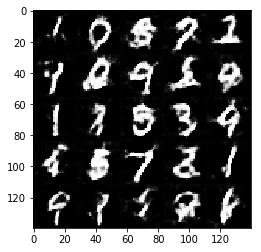

Step: 810... Epoch 1/2... Discriminator loss: 0.8303... Generator loss: 1.3285
Step: 820... Epoch 1/2... Discriminator loss: 0.8066... Generator loss: 1.6989
Step: 830... Epoch 1/2... Discriminator loss: 0.9382... Generator loss: 1.0049
Step: 840... Epoch 1/2... Discriminator loss: 0.9793... Generator loss: 2.7055
Step: 850... Epoch 1/2... Discriminator loss: 0.7122... Generator loss: 1.8897
Step: 860... Epoch 1/2... Discriminator loss: 1.0226... Generator loss: 1.0574
Step: 870... Epoch 1/2... Discriminator loss: 1.0566... Generator loss: 1.7824
Step: 880... Epoch 1/2... Discriminator loss: 0.7093... Generator loss: 1.7661
Step: 890... Epoch 1/2... Discriminator loss: 0.7241... Generator loss: 1.7735
Step: 900... Epoch 1/2... Discriminator loss: 0.8862... Generator loss: 1.1068


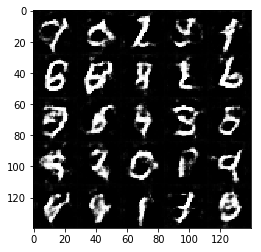

Step: 910... Epoch 1/2... Discriminator loss: 0.8764... Generator loss: 1.0717
Step: 920... Epoch 1/2... Discriminator loss: 0.7269... Generator loss: 1.3095
Step: 930... Epoch 1/2... Discriminator loss: 0.9439... Generator loss: 1.0451
Step: 940... Epoch 2/2... Discriminator loss: 0.8656... Generator loss: 1.0957
Step: 950... Epoch 2/2... Discriminator loss: 0.7715... Generator loss: 1.8894
Step: 960... Epoch 2/2... Discriminator loss: 0.8384... Generator loss: 1.2345
Step: 970... Epoch 2/2... Discriminator loss: 1.0491... Generator loss: 0.8216
Step: 980... Epoch 2/2... Discriminator loss: 0.9776... Generator loss: 0.9269
Step: 990... Epoch 2/2... Discriminator loss: 1.0121... Generator loss: 0.9305
Step: 1000... Epoch 2/2... Discriminator loss: 0.8490... Generator loss: 2.0736


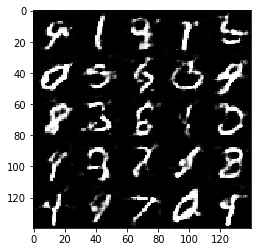

Step: 1010... Epoch 2/2... Discriminator loss: 0.9389... Generator loss: 1.0913
Step: 1020... Epoch 2/2... Discriminator loss: 0.6831... Generator loss: 1.9419
Step: 1030... Epoch 2/2... Discriminator loss: 0.6891... Generator loss: 1.6489
Step: 1040... Epoch 2/2... Discriminator loss: 0.9118... Generator loss: 1.0302
Step: 1050... Epoch 2/2... Discriminator loss: 0.8386... Generator loss: 1.1738
Step: 1060... Epoch 2/2... Discriminator loss: 0.9257... Generator loss: 1.0370
Step: 1070... Epoch 2/2... Discriminator loss: 0.7935... Generator loss: 1.5607
Step: 1080... Epoch 2/2... Discriminator loss: 0.9199... Generator loss: 1.0486
Step: 1090... Epoch 2/2... Discriminator loss: 0.8594... Generator loss: 2.1235
Step: 1100... Epoch 2/2... Discriminator loss: 0.8015... Generator loss: 1.2683


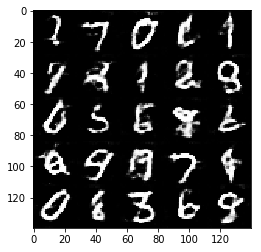

Step: 1110... Epoch 2/2... Discriminator loss: 0.7918... Generator loss: 1.3769
Step: 1120... Epoch 2/2... Discriminator loss: 1.0354... Generator loss: 2.4486
Step: 1130... Epoch 2/2... Discriminator loss: 0.7170... Generator loss: 1.7505
Step: 1140... Epoch 2/2... Discriminator loss: 0.7373... Generator loss: 1.4415
Step: 1150... Epoch 2/2... Discriminator loss: 0.8829... Generator loss: 1.0032
Step: 1160... Epoch 2/2... Discriminator loss: 0.8194... Generator loss: 1.8405
Step: 1170... Epoch 2/2... Discriminator loss: 0.8526... Generator loss: 1.1240
Step: 1180... Epoch 2/2... Discriminator loss: 0.9952... Generator loss: 0.8479
Step: 1190... Epoch 2/2... Discriminator loss: 1.8473... Generator loss: 0.3168
Step: 1200... Epoch 2/2... Discriminator loss: 0.8511... Generator loss: 1.0912


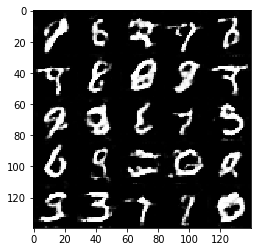

Step: 1210... Epoch 2/2... Discriminator loss: 0.6958... Generator loss: 2.0919
Step: 1220... Epoch 2/2... Discriminator loss: 0.8567... Generator loss: 1.6615
Step: 1230... Epoch 2/2... Discriminator loss: 1.4726... Generator loss: 0.5098
Step: 1240... Epoch 2/2... Discriminator loss: 0.9588... Generator loss: 0.9200
Step: 1250... Epoch 2/2... Discriminator loss: 0.8110... Generator loss: 2.0633
Step: 1260... Epoch 2/2... Discriminator loss: 0.7415... Generator loss: 1.3387
Step: 1270... Epoch 2/2... Discriminator loss: 0.9392... Generator loss: 0.9320
Step: 1280... Epoch 2/2... Discriminator loss: 1.0436... Generator loss: 0.8255
Step: 1290... Epoch 2/2... Discriminator loss: 0.7087... Generator loss: 1.3936
Step: 1300... Epoch 2/2... Discriminator loss: 0.6788... Generator loss: 1.9031


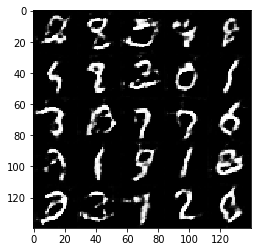

Step: 1310... Epoch 2/2... Discriminator loss: 0.6964... Generator loss: 1.4384
Step: 1320... Epoch 2/2... Discriminator loss: 2.2039... Generator loss: 0.2261
Step: 1330... Epoch 2/2... Discriminator loss: 1.3882... Generator loss: 0.5442
Step: 1340... Epoch 2/2... Discriminator loss: 0.8118... Generator loss: 1.3317
Step: 1350... Epoch 2/2... Discriminator loss: 0.9419... Generator loss: 1.0063
Step: 1360... Epoch 2/2... Discriminator loss: 0.9150... Generator loss: 0.9744
Step: 1370... Epoch 2/2... Discriminator loss: 0.7104... Generator loss: 1.6554
Step: 1380... Epoch 2/2... Discriminator loss: 0.7493... Generator loss: 1.4290
Step: 1390... Epoch 2/2... Discriminator loss: 0.7213... Generator loss: 1.4629
Step: 1400... Epoch 2/2... Discriminator loss: 1.7288... Generator loss: 3.0713


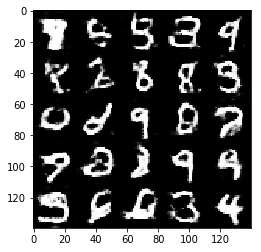

Step: 1410... Epoch 2/2... Discriminator loss: 0.7274... Generator loss: 1.6797
Step: 1420... Epoch 2/2... Discriminator loss: 0.7957... Generator loss: 1.2661
Step: 1430... Epoch 2/2... Discriminator loss: 0.8817... Generator loss: 0.9903
Step: 1440... Epoch 2/2... Discriminator loss: 0.6967... Generator loss: 1.3659
Step: 1450... Epoch 2/2... Discriminator loss: 0.8556... Generator loss: 1.1336
Step: 1460... Epoch 2/2... Discriminator loss: 1.2562... Generator loss: 0.5957
Step: 1470... Epoch 2/2... Discriminator loss: 1.3425... Generator loss: 0.7307
Step: 1480... Epoch 2/2... Discriminator loss: 0.7392... Generator loss: 1.3658
Step: 1490... Epoch 2/2... Discriminator loss: 0.7724... Generator loss: 1.3928
Step: 1500... Epoch 2/2... Discriminator loss: 0.6844... Generator loss: 1.6090


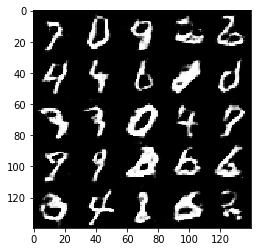

Step: 1510... Epoch 2/2... Discriminator loss: 0.7634... Generator loss: 1.2330
Step: 1520... Epoch 2/2... Discriminator loss: 0.8299... Generator loss: 1.1005
Step: 1530... Epoch 2/2... Discriminator loss: 0.6865... Generator loss: 1.5926
Step: 1540... Epoch 2/2... Discriminator loss: 0.6586... Generator loss: 1.5924
Step: 1550... Epoch 2/2... Discriminator loss: 0.8015... Generator loss: 1.1771
Step: 1560... Epoch 2/2... Discriminator loss: 0.7340... Generator loss: 1.7649
Step: 1570... Epoch 2/2... Discriminator loss: 1.0195... Generator loss: 0.8517
Step: 1580... Epoch 2/2... Discriminator loss: 0.8772... Generator loss: 1.0694
Step: 1590... Epoch 2/2... Discriminator loss: 1.4820... Generator loss: 0.4629
Step: 1600... Epoch 2/2... Discriminator loss: 0.7891... Generator loss: 1.3846


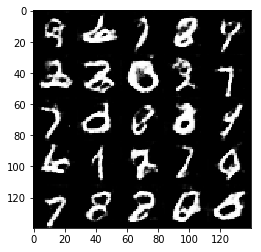

Step: 1610... Epoch 2/2... Discriminator loss: 0.9484... Generator loss: 1.3061
Step: 1620... Epoch 2/2... Discriminator loss: 0.9956... Generator loss: 1.7176
Step: 1630... Epoch 2/2... Discriminator loss: 1.0137... Generator loss: 0.8969
Step: 1640... Epoch 2/2... Discriminator loss: 0.8669... Generator loss: 1.2340
Step: 1650... Epoch 2/2... Discriminator loss: 0.7349... Generator loss: 1.2932
Step: 1660... Epoch 2/2... Discriminator loss: 0.7691... Generator loss: 1.2186
Step: 1670... Epoch 2/2... Discriminator loss: 0.6431... Generator loss: 1.6383
Step: 1680... Epoch 2/2... Discriminator loss: 0.7025... Generator loss: 1.4436
Step: 1690... Epoch 2/2... Discriminator loss: 1.2069... Generator loss: 0.7029
Step: 1700... Epoch 2/2... Discriminator loss: 1.1450... Generator loss: 0.6647


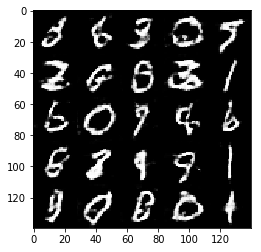

Step: 1710... Epoch 2/2... Discriminator loss: 1.3414... Generator loss: 0.5569
Step: 1720... Epoch 2/2... Discriminator loss: 1.4778... Generator loss: 0.5016
Step: 1730... Epoch 2/2... Discriminator loss: 0.8436... Generator loss: 1.1985
Step: 1740... Epoch 2/2... Discriminator loss: 0.8432... Generator loss: 1.1228
Step: 1750... Epoch 2/2... Discriminator loss: 0.7006... Generator loss: 1.8194
Step: 1760... Epoch 2/2... Discriminator loss: 0.6553... Generator loss: 1.5701
Step: 1770... Epoch 2/2... Discriminator loss: 0.8444... Generator loss: 1.1000
Step: 1780... Epoch 2/2... Discriminator loss: 0.7247... Generator loss: 1.3032
Step: 1790... Epoch 2/2... Discriminator loss: 1.0107... Generator loss: 0.9797
Step: 1800... Epoch 2/2... Discriminator loss: 0.9246... Generator loss: 0.9606


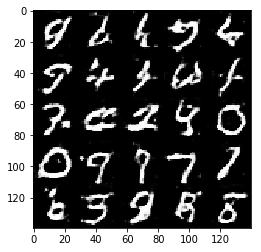

Step: 1810... Epoch 2/2... Discriminator loss: 0.9736... Generator loss: 0.9228
Step: 1820... Epoch 2/2... Discriminator loss: 1.3439... Generator loss: 0.5638
Step: 1830... Epoch 2/2... Discriminator loss: 1.3361... Generator loss: 0.5711
Step: 1840... Epoch 2/2... Discriminator loss: 0.7951... Generator loss: 1.4043
Step: 1850... Epoch 2/2... Discriminator loss: 0.7400... Generator loss: 1.4895
Step: 1860... Epoch 2/2... Discriminator loss: 0.8269... Generator loss: 1.8204
Step: 1870... Epoch 2/2... Discriminator loss: 0.8902... Generator loss: 1.0462


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Step: 10... Epoch 1/1... Discriminator loss: 1.5871... Generator loss: 0.4400
Step: 20... Epoch 1/1... Discriminator loss: 0.8165... Generator loss: 1.4969
Step: 30... Epoch 1/1... Discriminator loss: 0.5666... Generator loss: 7.0092
Step: 40... Epoch 1/1... Discriminator loss: 0.4248... Generator loss: 4.0371
Step: 50... Epoch 1/1... Discriminator loss: 0.5585... Generator loss: 2.2402
Step: 60... Epoch 1/1... Discriminator loss: 0.5156... Generator loss: 3.8593
Step: 70... Epoch 1/1... Discriminator loss: 0.8433... Generator loss: 1.1621
Step: 80... Epoch 1/1... Discriminator loss: 1.3363... Generator loss: 9.4992
Step: 90... Epoch 1/1... Discriminator loss: 0.5989... Generator loss: 1.7983
Step: 100... Epoch 1/1... Discriminator loss: 0.5633... Generator loss: 2.3991


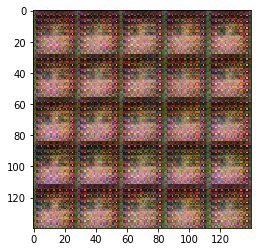

Step: 110... Epoch 1/1... Discriminator loss: 0.5530... Generator loss: 7.2310
Step: 120... Epoch 1/1... Discriminator loss: 0.4832... Generator loss: 2.8849
Step: 130... Epoch 1/1... Discriminator loss: 0.7320... Generator loss: 1.3022
Step: 140... Epoch 1/1... Discriminator loss: 0.4774... Generator loss: 4.6799
Step: 150... Epoch 1/1... Discriminator loss: 0.5096... Generator loss: 2.5332
Step: 160... Epoch 1/1... Discriminator loss: 0.4731... Generator loss: 2.5616
Step: 170... Epoch 1/1... Discriminator loss: 0.4414... Generator loss: 2.7571
Step: 180... Epoch 1/1... Discriminator loss: 0.3929... Generator loss: 3.5183
Step: 190... Epoch 1/1... Discriminator loss: 0.4168... Generator loss: 3.0410
Step: 200... Epoch 1/1... Discriminator loss: 0.4270... Generator loss: 4.0909


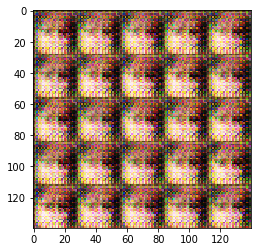

Step: 210... Epoch 1/1... Discriminator loss: 0.4971... Generator loss: 6.4090
Step: 220... Epoch 1/1... Discriminator loss: 0.4075... Generator loss: 3.3855
Step: 230... Epoch 1/1... Discriminator loss: 0.4725... Generator loss: 2.4456
Step: 240... Epoch 1/1... Discriminator loss: 0.8244... Generator loss: 2.6628
Step: 250... Epoch 1/1... Discriminator loss: 0.8908... Generator loss: 2.4158
Step: 260... Epoch 1/1... Discriminator loss: 0.6859... Generator loss: 1.9464
Step: 270... Epoch 1/1... Discriminator loss: 0.5022... Generator loss: 2.9781
Step: 280... Epoch 1/1... Discriminator loss: 0.8063... Generator loss: 1.1341
Step: 290... Epoch 1/1... Discriminator loss: 0.4756... Generator loss: 2.9712
Step: 300... Epoch 1/1... Discriminator loss: 0.5751... Generator loss: 2.2851


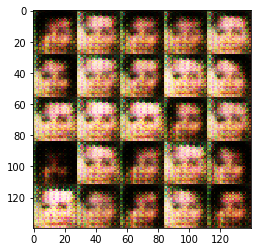

Step: 310... Epoch 1/1... Discriminator loss: 0.6577... Generator loss: 1.6302
Step: 320... Epoch 1/1... Discriminator loss: 0.5154... Generator loss: 4.3751
Step: 330... Epoch 1/1... Discriminator loss: 0.8248... Generator loss: 1.2070
Step: 340... Epoch 1/1... Discriminator loss: 0.7446... Generator loss: 2.5513
Step: 350... Epoch 1/1... Discriminator loss: 0.7367... Generator loss: 1.5096
Step: 360... Epoch 1/1... Discriminator loss: 0.9663... Generator loss: 2.0530
Step: 370... Epoch 1/1... Discriminator loss: 2.2440... Generator loss: 0.3135
Step: 380... Epoch 1/1... Discriminator loss: 0.9696... Generator loss: 1.2313
Step: 390... Epoch 1/1... Discriminator loss: 1.0279... Generator loss: 1.1209
Step: 400... Epoch 1/1... Discriminator loss: 0.7176... Generator loss: 2.6778


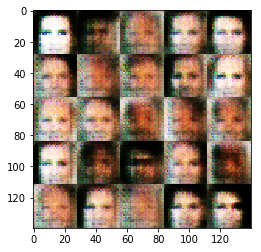

Step: 410... Epoch 1/1... Discriminator loss: 0.7387... Generator loss: 1.9793
Step: 420... Epoch 1/1... Discriminator loss: 0.7046... Generator loss: 1.4868
Step: 430... Epoch 1/1... Discriminator loss: 2.1872... Generator loss: 0.3624
Step: 440... Epoch 1/1... Discriminator loss: 0.8441... Generator loss: 1.4085
Step: 450... Epoch 1/1... Discriminator loss: 0.7234... Generator loss: 1.7091
Step: 460... Epoch 1/1... Discriminator loss: 0.9060... Generator loss: 1.2198
Step: 470... Epoch 1/1... Discriminator loss: 0.8512... Generator loss: 1.2681
Step: 480... Epoch 1/1... Discriminator loss: 0.9802... Generator loss: 2.7193
Step: 490... Epoch 1/1... Discriminator loss: 1.1056... Generator loss: 0.9256
Step: 500... Epoch 1/1... Discriminator loss: 1.0772... Generator loss: 2.5494


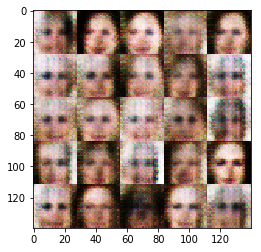

Step: 510... Epoch 1/1... Discriminator loss: 0.7697... Generator loss: 1.7240
Step: 520... Epoch 1/1... Discriminator loss: 0.7776... Generator loss: 1.4419
Step: 530... Epoch 1/1... Discriminator loss: 0.9740... Generator loss: 1.0284
Step: 540... Epoch 1/1... Discriminator loss: 0.8502... Generator loss: 1.4198
Step: 550... Epoch 1/1... Discriminator loss: 1.0559... Generator loss: 1.0000
Step: 560... Epoch 1/1... Discriminator loss: 0.9534... Generator loss: 1.0217
Step: 570... Epoch 1/1... Discriminator loss: 1.0231... Generator loss: 1.0886
Step: 580... Epoch 1/1... Discriminator loss: 0.7941... Generator loss: 1.5906
Step: 590... Epoch 1/1... Discriminator loss: 0.8382... Generator loss: 1.4258
Step: 600... Epoch 1/1... Discriminator loss: 1.2420... Generator loss: 0.6117


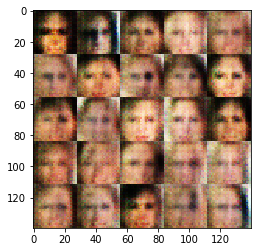

Step: 610... Epoch 1/1... Discriminator loss: 0.6367... Generator loss: 2.1022
Step: 620... Epoch 1/1... Discriminator loss: 0.5952... Generator loss: 2.1084
Step: 630... Epoch 1/1... Discriminator loss: 1.1568... Generator loss: 0.9231
Step: 640... Epoch 1/1... Discriminator loss: 1.2090... Generator loss: 0.7353
Step: 650... Epoch 1/1... Discriminator loss: 1.0018... Generator loss: 1.6601
Step: 660... Epoch 1/1... Discriminator loss: 1.1503... Generator loss: 0.9361
Step: 670... Epoch 1/1... Discriminator loss: 1.0420... Generator loss: 0.8250
Step: 680... Epoch 1/1... Discriminator loss: 1.1594... Generator loss: 0.7345
Step: 690... Epoch 1/1... Discriminator loss: 1.0121... Generator loss: 1.0176
Step: 700... Epoch 1/1... Discriminator loss: 1.1778... Generator loss: 0.8397


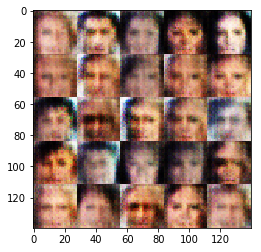

Step: 710... Epoch 1/1... Discriminator loss: 0.9821... Generator loss: 1.5533
Step: 720... Epoch 1/1... Discriminator loss: 0.9254... Generator loss: 1.4003
Step: 730... Epoch 1/1... Discriminator loss: 1.0728... Generator loss: 1.7287
Step: 740... Epoch 1/1... Discriminator loss: 1.0362... Generator loss: 2.0486
Step: 750... Epoch 1/1... Discriminator loss: 0.9098... Generator loss: 2.2136
Step: 760... Epoch 1/1... Discriminator loss: 0.9145... Generator loss: 1.0708
Step: 770... Epoch 1/1... Discriminator loss: 1.1481... Generator loss: 0.9168
Step: 780... Epoch 1/1... Discriminator loss: 1.2483... Generator loss: 1.7357
Step: 790... Epoch 1/1... Discriminator loss: 1.0159... Generator loss: 1.2233
Step: 800... Epoch 1/1... Discriminator loss: 1.1593... Generator loss: 1.2128


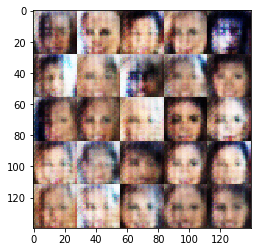

Step: 810... Epoch 1/1... Discriminator loss: 1.1752... Generator loss: 1.2064
Step: 820... Epoch 1/1... Discriminator loss: 1.1271... Generator loss: 0.7916
Step: 830... Epoch 1/1... Discriminator loss: 1.2376... Generator loss: 1.1104
Step: 840... Epoch 1/1... Discriminator loss: 1.0548... Generator loss: 1.1357
Step: 850... Epoch 1/1... Discriminator loss: 1.3581... Generator loss: 0.6712
Step: 860... Epoch 1/1... Discriminator loss: 1.1187... Generator loss: 1.2643
Step: 870... Epoch 1/1... Discriminator loss: 1.0756... Generator loss: 1.3926
Step: 880... Epoch 1/1... Discriminator loss: 1.4928... Generator loss: 0.4751
Step: 890... Epoch 1/1... Discriminator loss: 1.0931... Generator loss: 1.1568
Step: 900... Epoch 1/1... Discriminator loss: 1.2417... Generator loss: 0.6663


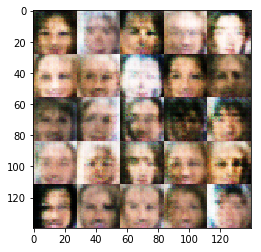

Step: 910... Epoch 1/1... Discriminator loss: 0.9003... Generator loss: 1.2615
Step: 920... Epoch 1/1... Discriminator loss: 1.0650... Generator loss: 0.9797
Step: 930... Epoch 1/1... Discriminator loss: 1.0653... Generator loss: 0.9801
Step: 940... Epoch 1/1... Discriminator loss: 1.3085... Generator loss: 0.6590
Step: 950... Epoch 1/1... Discriminator loss: 1.0270... Generator loss: 1.4567
Step: 960... Epoch 1/1... Discriminator loss: 0.9798... Generator loss: 1.2758
Step: 970... Epoch 1/1... Discriminator loss: 1.0450... Generator loss: 0.9020
Step: 980... Epoch 1/1... Discriminator loss: 1.1326... Generator loss: 0.8579
Step: 990... Epoch 1/1... Discriminator loss: 1.0043... Generator loss: 1.2075
Step: 1000... Epoch 1/1... Discriminator loss: 1.2327... Generator loss: 0.8889


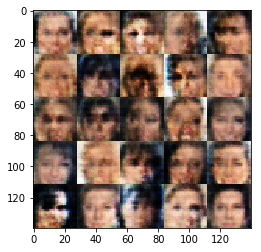

Step: 1010... Epoch 1/1... Discriminator loss: 0.9982... Generator loss: 1.3269
Step: 1020... Epoch 1/1... Discriminator loss: 1.0659... Generator loss: 1.2595
Step: 1030... Epoch 1/1... Discriminator loss: 1.3079... Generator loss: 0.7766
Step: 1040... Epoch 1/1... Discriminator loss: 1.0826... Generator loss: 1.1753
Step: 1050... Epoch 1/1... Discriminator loss: 1.0064... Generator loss: 1.6490
Step: 1060... Epoch 1/1... Discriminator loss: 1.2763... Generator loss: 1.0105
Step: 1070... Epoch 1/1... Discriminator loss: 1.0412... Generator loss: 0.9623
Step: 1080... Epoch 1/1... Discriminator loss: 1.0525... Generator loss: 1.1273
Step: 1090... Epoch 1/1... Discriminator loss: 1.4138... Generator loss: 0.5650
Step: 1100... Epoch 1/1... Discriminator loss: 1.0950... Generator loss: 1.3004


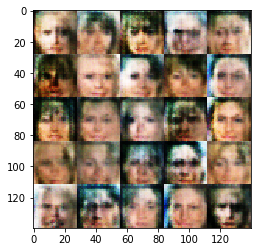

Step: 1110... Epoch 1/1... Discriminator loss: 1.1880... Generator loss: 0.7764
Step: 1120... Epoch 1/1... Discriminator loss: 1.1524... Generator loss: 1.1729
Step: 1130... Epoch 1/1... Discriminator loss: 1.1801... Generator loss: 1.2860
Step: 1140... Epoch 1/1... Discriminator loss: 1.4177... Generator loss: 0.5718
Step: 1150... Epoch 1/1... Discriminator loss: 1.3672... Generator loss: 0.6228
Step: 1160... Epoch 1/1... Discriminator loss: 1.0375... Generator loss: 1.0971
Step: 1170... Epoch 1/1... Discriminator loss: 1.3358... Generator loss: 0.6136
Step: 1180... Epoch 1/1... Discriminator loss: 1.1198... Generator loss: 0.9565
Step: 1190... Epoch 1/1... Discriminator loss: 1.0574... Generator loss: 1.1133
Step: 1200... Epoch 1/1... Discriminator loss: 1.0920... Generator loss: 0.9257


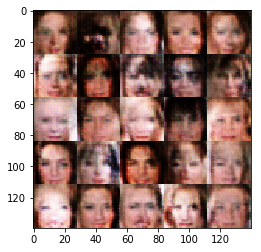

Step: 1210... Epoch 1/1... Discriminator loss: 1.2348... Generator loss: 0.6937
Step: 1220... Epoch 1/1... Discriminator loss: 0.9825... Generator loss: 1.2366
Step: 1230... Epoch 1/1... Discriminator loss: 1.1661... Generator loss: 0.8540
Step: 1240... Epoch 1/1... Discriminator loss: 1.2876... Generator loss: 0.7538
Step: 1250... Epoch 1/1... Discriminator loss: 1.3002... Generator loss: 0.6474
Step: 1260... Epoch 1/1... Discriminator loss: 1.1632... Generator loss: 1.0630
Step: 1270... Epoch 1/1... Discriminator loss: 1.0025... Generator loss: 1.6668
Step: 1280... Epoch 1/1... Discriminator loss: 1.2962... Generator loss: 0.9834
Step: 1290... Epoch 1/1... Discriminator loss: 0.9771... Generator loss: 1.0825
Step: 1300... Epoch 1/1... Discriminator loss: 0.9814... Generator loss: 1.3667


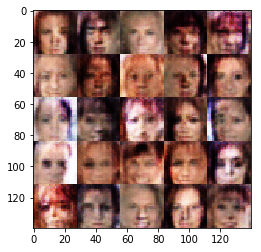

Step: 1310... Epoch 1/1... Discriminator loss: 1.1960... Generator loss: 1.0293
Step: 1320... Epoch 1/1... Discriminator loss: 1.1616... Generator loss: 0.8270
Step: 1330... Epoch 1/1... Discriminator loss: 0.9115... Generator loss: 1.0432
Step: 1340... Epoch 1/1... Discriminator loss: 1.5345... Generator loss: 0.4366
Step: 1350... Epoch 1/1... Discriminator loss: 1.0958... Generator loss: 1.0694
Step: 1360... Epoch 1/1... Discriminator loss: 1.0738... Generator loss: 1.5804
Step: 1370... Epoch 1/1... Discriminator loss: 1.1696... Generator loss: 0.7538
Step: 1380... Epoch 1/1... Discriminator loss: 1.1608... Generator loss: 0.8320
Step: 1390... Epoch 1/1... Discriminator loss: 1.0637... Generator loss: 1.0097
Step: 1400... Epoch 1/1... Discriminator loss: 1.1552... Generator loss: 1.0878


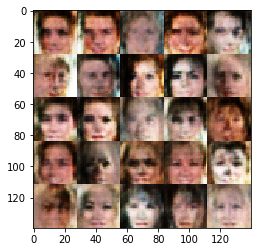

Step: 1410... Epoch 1/1... Discriminator loss: 1.2858... Generator loss: 0.6208
Step: 1420... Epoch 1/1... Discriminator loss: 1.1877... Generator loss: 0.8217
Step: 1430... Epoch 1/1... Discriminator loss: 0.9157... Generator loss: 1.3831
Step: 1440... Epoch 1/1... Discriminator loss: 1.1153... Generator loss: 1.4074
Step: 1450... Epoch 1/1... Discriminator loss: 0.9672... Generator loss: 1.2301
Step: 1460... Epoch 1/1... Discriminator loss: 0.9796... Generator loss: 1.2363
Step: 1470... Epoch 1/1... Discriminator loss: 1.0888... Generator loss: 1.0899
Step: 1480... Epoch 1/1... Discriminator loss: 0.9047... Generator loss: 1.4728
Step: 1490... Epoch 1/1... Discriminator loss: 1.2466... Generator loss: 0.7094
Step: 1500... Epoch 1/1... Discriminator loss: 1.0575... Generator loss: 0.9898


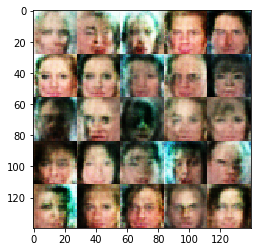

Step: 1510... Epoch 1/1... Discriminator loss: 1.1637... Generator loss: 1.1704
Step: 1520... Epoch 1/1... Discriminator loss: 1.3338... Generator loss: 0.5964
Step: 1530... Epoch 1/1... Discriminator loss: 1.1780... Generator loss: 0.7182
Step: 1540... Epoch 1/1... Discriminator loss: 0.9920... Generator loss: 1.3976
Step: 1550... Epoch 1/1... Discriminator loss: 1.2584... Generator loss: 0.6898
Step: 1560... Epoch 1/1... Discriminator loss: 1.1246... Generator loss: 0.8930
Step: 1570... Epoch 1/1... Discriminator loss: 1.1277... Generator loss: 0.8795
Step: 1580... Epoch 1/1... Discriminator loss: 1.1551... Generator loss: 0.7339
Step: 1590... Epoch 1/1... Discriminator loss: 1.1851... Generator loss: 0.9951
Step: 1600... Epoch 1/1... Discriminator loss: 0.9358... Generator loss: 1.3473


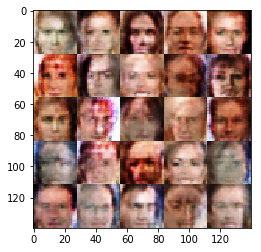

Step: 1610... Epoch 1/1... Discriminator loss: 1.1766... Generator loss: 0.9924
Step: 1620... Epoch 1/1... Discriminator loss: 0.9777... Generator loss: 1.0135
Step: 1630... Epoch 1/1... Discriminator loss: 1.0019... Generator loss: 1.3053
Step: 1640... Epoch 1/1... Discriminator loss: 1.1454... Generator loss: 1.2160
Step: 1650... Epoch 1/1... Discriminator loss: 0.9822... Generator loss: 1.3364
Step: 1660... Epoch 1/1... Discriminator loss: 1.0587... Generator loss: 0.9754
Step: 1670... Epoch 1/1... Discriminator loss: 0.9564... Generator loss: 1.1964
Step: 1680... Epoch 1/1... Discriminator loss: 1.0864... Generator loss: 1.0850
Step: 1690... Epoch 1/1... Discriminator loss: 1.3367... Generator loss: 0.5636
Step: 1700... Epoch 1/1... Discriminator loss: 1.0997... Generator loss: 0.9042


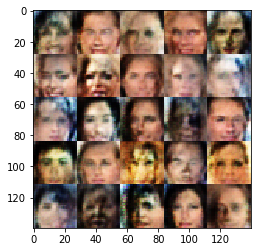

Step: 1710... Epoch 1/1... Discriminator loss: 1.0662... Generator loss: 1.2206
Step: 1720... Epoch 1/1... Discriminator loss: 1.0138... Generator loss: 0.8783
Step: 1730... Epoch 1/1... Discriminator loss: 0.9738... Generator loss: 0.9689
Step: 1740... Epoch 1/1... Discriminator loss: 1.1121... Generator loss: 0.7245
Step: 1750... Epoch 1/1... Discriminator loss: 0.9349... Generator loss: 1.5712
Step: 1760... Epoch 1/1... Discriminator loss: 0.9936... Generator loss: 1.8366
Step: 1770... Epoch 1/1... Discriminator loss: 1.1500... Generator loss: 0.7097
Step: 1780... Epoch 1/1... Discriminator loss: 1.4488... Generator loss: 0.6259
Step: 1790... Epoch 1/1... Discriminator loss: 1.1703... Generator loss: 0.7504
Step: 1800... Epoch 1/1... Discriminator loss: 0.9075... Generator loss: 1.6095


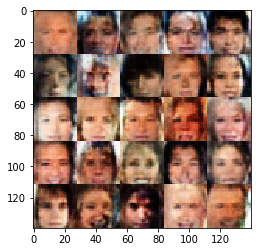

Step: 1810... Epoch 1/1... Discriminator loss: 0.9171... Generator loss: 1.1553
Step: 1820... Epoch 1/1... Discriminator loss: 1.0630... Generator loss: 1.3444
Step: 1830... Epoch 1/1... Discriminator loss: 1.1759... Generator loss: 0.7990
Step: 1840... Epoch 1/1... Discriminator loss: 1.0050... Generator loss: 1.0183
Step: 1850... Epoch 1/1... Discriminator loss: 1.0791... Generator loss: 0.9846
Step: 1860... Epoch 1/1... Discriminator loss: 1.0518... Generator loss: 1.1221
Step: 1870... Epoch 1/1... Discriminator loss: 1.0144... Generator loss: 1.0767
Step: 1880... Epoch 1/1... Discriminator loss: 1.0247... Generator loss: 1.0536
Step: 1890... Epoch 1/1... Discriminator loss: 1.2762... Generator loss: 0.6462
Step: 1900... Epoch 1/1... Discriminator loss: 1.0167... Generator loss: 1.2793


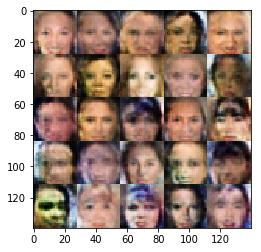

Step: 1910... Epoch 1/1... Discriminator loss: 1.0393... Generator loss: 1.0541
Step: 1920... Epoch 1/1... Discriminator loss: 1.0455... Generator loss: 0.9651
Step: 1930... Epoch 1/1... Discriminator loss: 1.1802... Generator loss: 0.7211
Step: 1940... Epoch 1/1... Discriminator loss: 0.9972... Generator loss: 0.9754
Step: 1950... Epoch 1/1... Discriminator loss: 0.9168... Generator loss: 1.3839
Step: 1960... Epoch 1/1... Discriminator loss: 0.9770... Generator loss: 1.1696
Step: 1970... Epoch 1/1... Discriminator loss: 0.8761... Generator loss: 1.5786
Step: 1980... Epoch 1/1... Discriminator loss: 0.9638... Generator loss: 1.6336
Step: 1990... Epoch 1/1... Discriminator loss: 1.2156... Generator loss: 0.6238
Step: 2000... Epoch 1/1... Discriminator loss: 0.8656... Generator loss: 1.5472


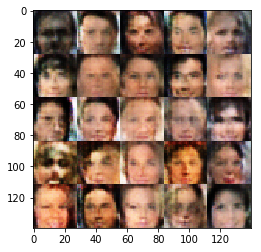

Step: 2010... Epoch 1/1... Discriminator loss: 1.1799... Generator loss: 0.7731
Step: 2020... Epoch 1/1... Discriminator loss: 0.9667... Generator loss: 0.9163
Step: 2030... Epoch 1/1... Discriminator loss: 1.2505... Generator loss: 1.0945
Step: 2040... Epoch 1/1... Discriminator loss: 0.8046... Generator loss: 1.7187
Step: 2050... Epoch 1/1... Discriminator loss: 1.2191... Generator loss: 0.9363
Step: 2060... Epoch 1/1... Discriminator loss: 0.9663... Generator loss: 1.7639
Step: 2070... Epoch 1/1... Discriminator loss: 1.2829... Generator loss: 1.0282
Step: 2080... Epoch 1/1... Discriminator loss: 1.0748... Generator loss: 0.8149
Step: 2090... Epoch 1/1... Discriminator loss: 1.1005... Generator loss: 0.8350
Step: 2100... Epoch 1/1... Discriminator loss: 1.5021... Generator loss: 0.6096


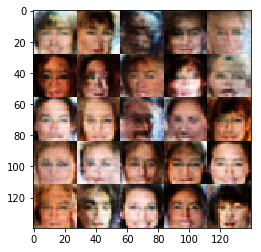

Step: 2110... Epoch 1/1... Discriminator loss: 0.9920... Generator loss: 1.1116
Step: 2120... Epoch 1/1... Discriminator loss: 0.9316... Generator loss: 1.1583
Step: 2130... Epoch 1/1... Discriminator loss: 1.2336... Generator loss: 1.9757
Step: 2140... Epoch 1/1... Discriminator loss: 1.0568... Generator loss: 1.0157
Step: 2150... Epoch 1/1... Discriminator loss: 1.0756... Generator loss: 1.0811
Step: 2160... Epoch 1/1... Discriminator loss: 1.2042... Generator loss: 0.9816
Step: 2170... Epoch 1/1... Discriminator loss: 0.9623... Generator loss: 0.9591
Step: 2180... Epoch 1/1... Discriminator loss: 0.9586... Generator loss: 1.1280
Step: 2190... Epoch 1/1... Discriminator loss: 1.5094... Generator loss: 0.4716
Step: 2200... Epoch 1/1... Discriminator loss: 1.1655... Generator loss: 0.8347


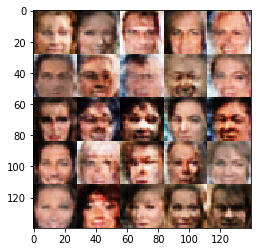

Step: 2210... Epoch 1/1... Discriminator loss: 0.9207... Generator loss: 1.2998
Step: 2220... Epoch 1/1... Discriminator loss: 1.0303... Generator loss: 1.3048
Step: 2230... Epoch 1/1... Discriminator loss: 1.5698... Generator loss: 0.4203
Step: 2240... Epoch 1/1... Discriminator loss: 1.1331... Generator loss: 0.8595
Step: 2250... Epoch 1/1... Discriminator loss: 1.4004... Generator loss: 1.0077
Step: 2260... Epoch 1/1... Discriminator loss: 1.2319... Generator loss: 0.6308
Step: 2270... Epoch 1/1... Discriminator loss: 0.9398... Generator loss: 1.3647
Step: 2280... Epoch 1/1... Discriminator loss: 0.7986... Generator loss: 1.2744
Step: 2290... Epoch 1/1... Discriminator loss: 1.0725... Generator loss: 1.6252
Step: 2300... Epoch 1/1... Discriminator loss: 1.0064... Generator loss: 0.9306


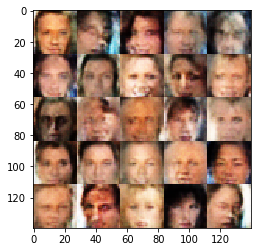

Step: 2310... Epoch 1/1... Discriminator loss: 0.9897... Generator loss: 0.9296
Step: 2320... Epoch 1/1... Discriminator loss: 1.0139... Generator loss: 1.2131
Step: 2330... Epoch 1/1... Discriminator loss: 1.1576... Generator loss: 0.7851
Step: 2340... Epoch 1/1... Discriminator loss: 1.1099... Generator loss: 0.8213
Step: 2350... Epoch 1/1... Discriminator loss: 1.0572... Generator loss: 1.0834
Step: 2360... Epoch 1/1... Discriminator loss: 1.2347... Generator loss: 0.9289
Step: 2370... Epoch 1/1... Discriminator loss: 1.1297... Generator loss: 0.9003
Step: 2380... Epoch 1/1... Discriminator loss: 1.0837... Generator loss: 0.9874
Step: 2390... Epoch 1/1... Discriminator loss: 1.1262... Generator loss: 0.7125
Step: 2400... Epoch 1/1... Discriminator loss: 1.1091... Generator loss: 1.3025


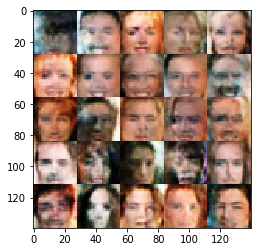

Step: 2410... Epoch 1/1... Discriminator loss: 1.0872... Generator loss: 0.9295
Step: 2420... Epoch 1/1... Discriminator loss: 0.9752... Generator loss: 1.3118
Step: 2430... Epoch 1/1... Discriminator loss: 1.2262... Generator loss: 0.8496
Step: 2440... Epoch 1/1... Discriminator loss: 1.4759... Generator loss: 0.4743
Step: 2450... Epoch 1/1... Discriminator loss: 1.3083... Generator loss: 1.9675
Step: 2460... Epoch 1/1... Discriminator loss: 1.2099... Generator loss: 0.6948
Step: 2470... Epoch 1/1... Discriminator loss: 1.4430... Generator loss: 0.5378
Step: 2480... Epoch 1/1... Discriminator loss: 1.0272... Generator loss: 1.0355
Step: 2490... Epoch 1/1... Discriminator loss: 1.0580... Generator loss: 1.1502
Step: 2500... Epoch 1/1... Discriminator loss: 1.2205... Generator loss: 0.7643


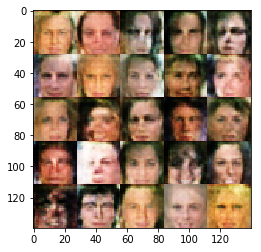

Step: 2510... Epoch 1/1... Discriminator loss: 0.7709... Generator loss: 1.5249
Step: 2520... Epoch 1/1... Discriminator loss: 1.2594... Generator loss: 0.8308
Step: 2530... Epoch 1/1... Discriminator loss: 0.9345... Generator loss: 1.4778
Step: 2540... Epoch 1/1... Discriminator loss: 1.1415... Generator loss: 0.9807
Step: 2550... Epoch 1/1... Discriminator loss: 1.1552... Generator loss: 0.7891
Step: 2560... Epoch 1/1... Discriminator loss: 1.1666... Generator loss: 0.8902
Step: 2570... Epoch 1/1... Discriminator loss: 1.0989... Generator loss: 1.0296
Step: 2580... Epoch 1/1... Discriminator loss: 0.7608... Generator loss: 1.6388
Step: 2590... Epoch 1/1... Discriminator loss: 0.9714... Generator loss: 1.4384
Step: 2600... Epoch 1/1... Discriminator loss: 1.2083... Generator loss: 0.7295


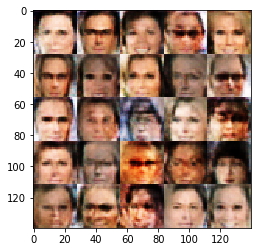

Step: 2610... Epoch 1/1... Discriminator loss: 1.0442... Generator loss: 0.8659
Step: 2620... Epoch 1/1... Discriminator loss: 1.0951... Generator loss: 0.8430
Step: 2630... Epoch 1/1... Discriminator loss: 1.0613... Generator loss: 1.1136
Step: 2640... Epoch 1/1... Discriminator loss: 1.0831... Generator loss: 1.1188
Step: 2650... Epoch 1/1... Discriminator loss: 1.1335... Generator loss: 0.8870
Step: 2660... Epoch 1/1... Discriminator loss: 1.3137... Generator loss: 0.7158
Step: 2670... Epoch 1/1... Discriminator loss: 1.0184... Generator loss: 1.0353
Step: 2680... Epoch 1/1... Discriminator loss: 1.5815... Generator loss: 0.4696
Step: 2690... Epoch 1/1... Discriminator loss: 0.9474... Generator loss: 1.0990
Step: 2700... Epoch 1/1... Discriminator loss: 1.0301... Generator loss: 1.3855


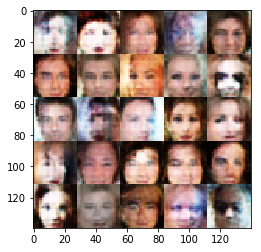

Step: 2710... Epoch 1/1... Discriminator loss: 1.0284... Generator loss: 1.0988
Step: 2720... Epoch 1/1... Discriminator loss: 0.9805... Generator loss: 1.2272
Step: 2730... Epoch 1/1... Discriminator loss: 1.1503... Generator loss: 1.0412
Step: 2740... Epoch 1/1... Discriminator loss: 1.2276... Generator loss: 0.7678
Step: 2750... Epoch 1/1... Discriminator loss: 1.0238... Generator loss: 1.0182
Step: 2760... Epoch 1/1... Discriminator loss: 1.2041... Generator loss: 1.0016
Step: 2770... Epoch 1/1... Discriminator loss: 1.2285... Generator loss: 0.6481
Step: 2780... Epoch 1/1... Discriminator loss: 1.1897... Generator loss: 0.8015
Step: 2790... Epoch 1/1... Discriminator loss: 1.0248... Generator loss: 0.9277
Step: 2800... Epoch 1/1... Discriminator loss: 1.1763... Generator loss: 0.9875


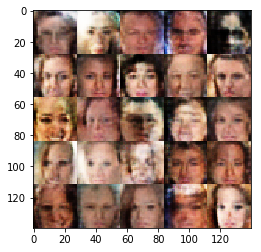

Step: 2810... Epoch 1/1... Discriminator loss: 0.9464... Generator loss: 1.2128
Step: 2820... Epoch 1/1... Discriminator loss: 1.1337... Generator loss: 0.9249
Step: 2830... Epoch 1/1... Discriminator loss: 1.0155... Generator loss: 1.4534
Step: 2840... Epoch 1/1... Discriminator loss: 1.2880... Generator loss: 0.7674
Step: 2850... Epoch 1/1... Discriminator loss: 1.3668... Generator loss: 0.5729
Step: 2860... Epoch 1/1... Discriminator loss: 1.1798... Generator loss: 1.4031
Step: 2870... Epoch 1/1... Discriminator loss: 0.9509... Generator loss: 1.2028
Step: 2880... Epoch 1/1... Discriminator loss: 1.0957... Generator loss: 0.9420
Step: 2890... Epoch 1/1... Discriminator loss: 1.1348... Generator loss: 1.1288
Step: 2900... Epoch 1/1... Discriminator loss: 1.0374... Generator loss: 0.9604


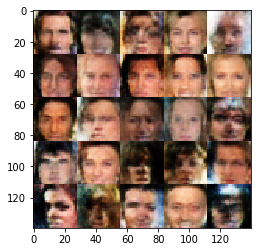

Step: 2910... Epoch 1/1... Discriminator loss: 1.0541... Generator loss: 1.0291
Step: 2920... Epoch 1/1... Discriminator loss: 1.0242... Generator loss: 1.1288
Step: 2930... Epoch 1/1... Discriminator loss: 1.3471... Generator loss: 0.6399
Step: 2940... Epoch 1/1... Discriminator loss: 0.8833... Generator loss: 1.4266
Step: 2950... Epoch 1/1... Discriminator loss: 0.9104... Generator loss: 1.3432
Step: 2960... Epoch 1/1... Discriminator loss: 1.0489... Generator loss: 1.1917
Step: 2970... Epoch 1/1... Discriminator loss: 1.1577... Generator loss: 0.9485
Step: 2980... Epoch 1/1... Discriminator loss: 1.0216... Generator loss: 1.2947
Step: 2990... Epoch 1/1... Discriminator loss: 0.8570... Generator loss: 1.2942
Step: 3000... Epoch 1/1... Discriminator loss: 0.9815... Generator loss: 1.1823


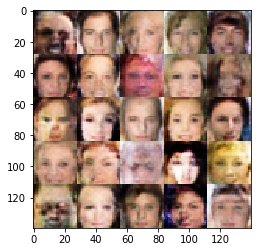

Step: 3010... Epoch 1/1... Discriminator loss: 1.0578... Generator loss: 0.9221
Step: 3020... Epoch 1/1... Discriminator loss: 1.1906... Generator loss: 0.7079
Step: 3030... Epoch 1/1... Discriminator loss: 1.0447... Generator loss: 0.8202
Step: 3040... Epoch 1/1... Discriminator loss: 1.0017... Generator loss: 1.0215
Step: 3050... Epoch 1/1... Discriminator loss: 0.7372... Generator loss: 1.6503
Step: 3060... Epoch 1/1... Discriminator loss: 1.0061... Generator loss: 1.2986
Step: 3070... Epoch 1/1... Discriminator loss: 1.1080... Generator loss: 0.9521
Step: 3080... Epoch 1/1... Discriminator loss: 0.7433... Generator loss: 1.4385
Step: 3090... Epoch 1/1... Discriminator loss: 1.3359... Generator loss: 0.5727
Step: 3100... Epoch 1/1... Discriminator loss: 1.1683... Generator loss: 0.7968


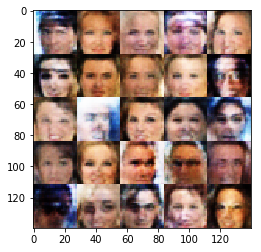

Step: 3110... Epoch 1/1... Discriminator loss: 1.3308... Generator loss: 0.7394
Step: 3120... Epoch 1/1... Discriminator loss: 1.5994... Generator loss: 0.3885
Step: 3130... Epoch 1/1... Discriminator loss: 1.3775... Generator loss: 1.0097
Step: 3140... Epoch 1/1... Discriminator loss: 0.9890... Generator loss: 1.4316
Step: 3150... Epoch 1/1... Discriminator loss: 1.1921... Generator loss: 0.7217
Step: 3160... Epoch 1/1... Discriminator loss: 1.0364... Generator loss: 0.9464
Step: 3170... Epoch 1/1... Discriminator loss: 1.0970... Generator loss: 1.4573
Step: 3180... Epoch 1/1... Discriminator loss: 1.0296... Generator loss: 1.4062
Step: 3190... Epoch 1/1... Discriminator loss: 1.3082... Generator loss: 0.5735
Step: 3200... Epoch 1/1... Discriminator loss: 1.4341... Generator loss: 0.5724


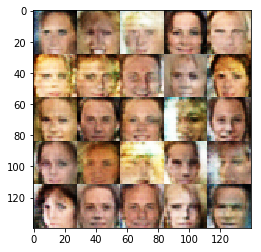

Step: 3210... Epoch 1/1... Discriminator loss: 0.8111... Generator loss: 1.3513
Step: 3220... Epoch 1/1... Discriminator loss: 1.1040... Generator loss: 0.8054
Step: 3230... Epoch 1/1... Discriminator loss: 1.0310... Generator loss: 0.9709
Step: 3240... Epoch 1/1... Discriminator loss: 0.9670... Generator loss: 1.3525
Step: 3250... Epoch 1/1... Discriminator loss: 1.0245... Generator loss: 0.9082
Step: 3260... Epoch 1/1... Discriminator loss: 1.1231... Generator loss: 1.1209
Step: 3270... Epoch 1/1... Discriminator loss: 1.0461... Generator loss: 0.8702
Step: 3280... Epoch 1/1... Discriminator loss: 1.1146... Generator loss: 0.8901
Step: 3290... Epoch 1/1... Discriminator loss: 1.1941... Generator loss: 0.7400
Step: 3300... Epoch 1/1... Discriminator loss: 0.8482... Generator loss: 1.3243


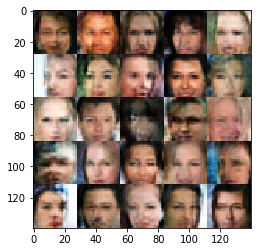

Step: 3310... Epoch 1/1... Discriminator loss: 0.8477... Generator loss: 1.4270
Step: 3320... Epoch 1/1... Discriminator loss: 0.9832... Generator loss: 1.2166
Step: 3330... Epoch 1/1... Discriminator loss: 1.0404... Generator loss: 1.0353
Step: 3340... Epoch 1/1... Discriminator loss: 1.0762... Generator loss: 0.7552
Step: 3350... Epoch 1/1... Discriminator loss: 1.1542... Generator loss: 0.7734
Step: 3360... Epoch 1/1... Discriminator loss: 1.0372... Generator loss: 1.1678
Step: 3370... Epoch 1/1... Discriminator loss: 1.4650... Generator loss: 0.4537
Step: 3380... Epoch 1/1... Discriminator loss: 0.9458... Generator loss: 1.5294
Step: 3390... Epoch 1/1... Discriminator loss: 1.1209... Generator loss: 0.7824
Step: 3400... Epoch 1/1... Discriminator loss: 1.0223... Generator loss: 1.1452


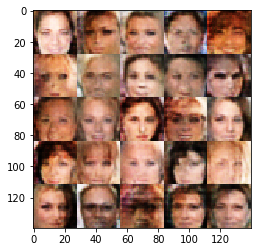

Step: 3410... Epoch 1/1... Discriminator loss: 0.8474... Generator loss: 1.2151
Step: 3420... Epoch 1/1... Discriminator loss: 0.7935... Generator loss: 1.1924
Step: 3430... Epoch 1/1... Discriminator loss: 0.9692... Generator loss: 1.0071
Step: 3440... Epoch 1/1... Discriminator loss: 0.9390... Generator loss: 1.2222
Step: 3450... Epoch 1/1... Discriminator loss: 1.2987... Generator loss: 0.5880
Step: 3460... Epoch 1/1... Discriminator loss: 1.1084... Generator loss: 0.7555
Step: 3470... Epoch 1/1... Discriminator loss: 1.0874... Generator loss: 1.2958
Step: 3480... Epoch 1/1... Discriminator loss: 1.0439... Generator loss: 0.8404
Step: 3490... Epoch 1/1... Discriminator loss: 0.9694... Generator loss: 0.9464
Step: 3500... Epoch 1/1... Discriminator loss: 0.9612... Generator loss: 1.1606


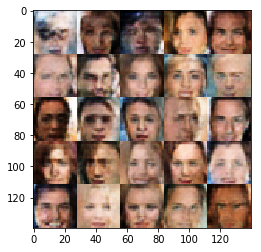

Step: 3510... Epoch 1/1... Discriminator loss: 1.0553... Generator loss: 0.8704
Step: 3520... Epoch 1/1... Discriminator loss: 1.0432... Generator loss: 1.1214
Step: 3530... Epoch 1/1... Discriminator loss: 1.0581... Generator loss: 0.9425
Step: 3540... Epoch 1/1... Discriminator loss: 1.2771... Generator loss: 0.5740
Step: 3550... Epoch 1/1... Discriminator loss: 1.0463... Generator loss: 1.0894
Step: 3560... Epoch 1/1... Discriminator loss: 1.1830... Generator loss: 0.7891
Step: 3570... Epoch 1/1... Discriminator loss: 0.9342... Generator loss: 1.0050
Step: 3580... Epoch 1/1... Discriminator loss: 1.1907... Generator loss: 0.8336
Step: 3590... Epoch 1/1... Discriminator loss: 1.0459... Generator loss: 1.1264
Step: 3600... Epoch 1/1... Discriminator loss: 1.1460... Generator loss: 1.2181


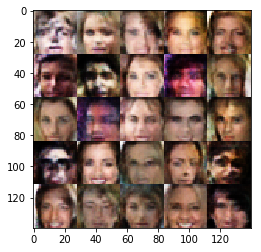

Step: 3610... Epoch 1/1... Discriminator loss: 1.3716... Generator loss: 0.5511
Step: 3620... Epoch 1/1... Discriminator loss: 1.1807... Generator loss: 0.8147
Step: 3630... Epoch 1/1... Discriminator loss: 0.9904... Generator loss: 0.9547
Step: 3640... Epoch 1/1... Discriminator loss: 1.1388... Generator loss: 0.9151
Step: 3650... Epoch 1/1... Discriminator loss: 0.9184... Generator loss: 1.6398
Step: 3660... Epoch 1/1... Discriminator loss: 1.0506... Generator loss: 0.9555
Step: 3670... Epoch 1/1... Discriminator loss: 1.3388... Generator loss: 0.9133
Step: 3680... Epoch 1/1... Discriminator loss: 1.1224... Generator loss: 1.0604
Step: 3690... Epoch 1/1... Discriminator loss: 1.2196... Generator loss: 0.7270
Step: 3700... Epoch 1/1... Discriminator loss: 1.0238... Generator loss: 1.0316


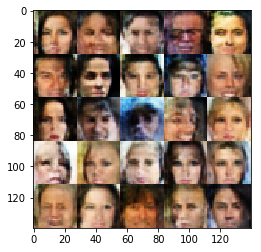

Step: 3710... Epoch 1/1... Discriminator loss: 1.2796... Generator loss: 0.6451
Step: 3720... Epoch 1/1... Discriminator loss: 0.9723... Generator loss: 1.0986
Step: 3730... Epoch 1/1... Discriminator loss: 0.9690... Generator loss: 1.0625
Step: 3740... Epoch 1/1... Discriminator loss: 1.1256... Generator loss: 1.3044
Step: 3750... Epoch 1/1... Discriminator loss: 1.1154... Generator loss: 1.0623
Step: 3760... Epoch 1/1... Discriminator loss: 0.9645... Generator loss: 1.1172
Step: 3770... Epoch 1/1... Discriminator loss: 1.0446... Generator loss: 1.1349
Step: 3780... Epoch 1/1... Discriminator loss: 1.3947... Generator loss: 0.5886
Step: 3790... Epoch 1/1... Discriminator loss: 1.2173... Generator loss: 0.6393
Step: 3800... Epoch 1/1... Discriminator loss: 0.8837... Generator loss: 1.2774


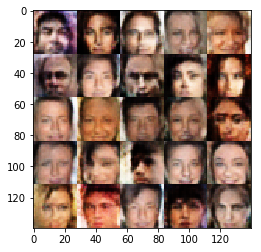

Step: 3810... Epoch 1/1... Discriminator loss: 1.0339... Generator loss: 1.1670
Step: 3820... Epoch 1/1... Discriminator loss: 0.9558... Generator loss: 0.9969
Step: 3830... Epoch 1/1... Discriminator loss: 0.9814... Generator loss: 0.9437
Step: 3840... Epoch 1/1... Discriminator loss: 1.0353... Generator loss: 1.3512
Step: 3850... Epoch 1/1... Discriminator loss: 1.1008... Generator loss: 0.9961
Step: 3860... Epoch 1/1... Discriminator loss: 1.2135... Generator loss: 0.8732
Step: 3870... Epoch 1/1... Discriminator loss: 1.3500... Generator loss: 0.5699
Step: 3880... Epoch 1/1... Discriminator loss: 1.1573... Generator loss: 0.7625
Step: 3890... Epoch 1/1... Discriminator loss: 0.8521... Generator loss: 1.4259
Step: 3900... Epoch 1/1... Discriminator loss: 1.0272... Generator loss: 1.3495


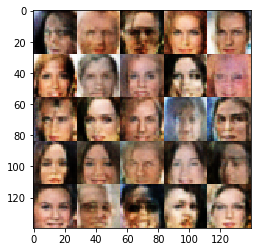

Step: 3910... Epoch 1/1... Discriminator loss: 1.1067... Generator loss: 0.8850
Step: 3920... Epoch 1/1... Discriminator loss: 0.9252... Generator loss: 1.1909
Step: 3930... Epoch 1/1... Discriminator loss: 1.2251... Generator loss: 0.6582
Step: 3940... Epoch 1/1... Discriminator loss: 1.0163... Generator loss: 1.0341
Step: 3950... Epoch 1/1... Discriminator loss: 1.0867... Generator loss: 0.9378
Step: 3960... Epoch 1/1... Discriminator loss: 0.8384... Generator loss: 1.2032
Step: 3970... Epoch 1/1... Discriminator loss: 0.9419... Generator loss: 1.1091
Step: 3980... Epoch 1/1... Discriminator loss: 1.0697... Generator loss: 0.9366
Step: 3990... Epoch 1/1... Discriminator loss: 1.0423... Generator loss: 1.0081
Step: 4000... Epoch 1/1... Discriminator loss: 1.2211... Generator loss: 0.7067


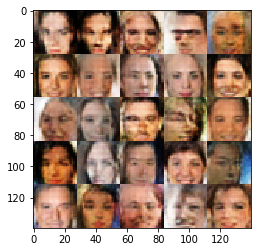

Step: 4010... Epoch 1/1... Discriminator loss: 1.1291... Generator loss: 0.8274
Step: 4020... Epoch 1/1... Discriminator loss: 1.2145... Generator loss: 0.9164
Step: 4030... Epoch 1/1... Discriminator loss: 1.1923... Generator loss: 0.7022
Step: 4040... Epoch 1/1... Discriminator loss: 1.0249... Generator loss: 1.2082
Step: 4050... Epoch 1/1... Discriminator loss: 1.2262... Generator loss: 0.9098
Step: 4060... Epoch 1/1... Discriminator loss: 1.0929... Generator loss: 0.8886
Step: 4070... Epoch 1/1... Discriminator loss: 1.2804... Generator loss: 0.6613
Step: 4080... Epoch 1/1... Discriminator loss: 0.8406... Generator loss: 1.6464
Step: 4090... Epoch 1/1... Discriminator loss: 1.0510... Generator loss: 0.9503
Step: 4100... Epoch 1/1... Discriminator loss: 1.0659... Generator loss: 0.7395


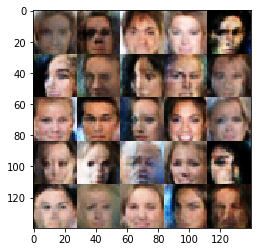

Step: 4110... Epoch 1/1... Discriminator loss: 0.9301... Generator loss: 1.1575
Step: 4120... Epoch 1/1... Discriminator loss: 0.9855... Generator loss: 1.0049
Step: 4130... Epoch 1/1... Discriminator loss: 1.0704... Generator loss: 1.0527
Step: 4140... Epoch 1/1... Discriminator loss: 0.9983... Generator loss: 1.1381
Step: 4150... Epoch 1/1... Discriminator loss: 0.8611... Generator loss: 1.2300
Step: 4160... Epoch 1/1... Discriminator loss: 1.1655... Generator loss: 0.9312
Step: 4170... Epoch 1/1... Discriminator loss: 1.1194... Generator loss: 0.7936
Step: 4180... Epoch 1/1... Discriminator loss: 1.2289... Generator loss: 0.7193
Step: 4190... Epoch 1/1... Discriminator loss: 1.0754... Generator loss: 0.9266
Step: 4200... Epoch 1/1... Discriminator loss: 0.8023... Generator loss: 1.2845


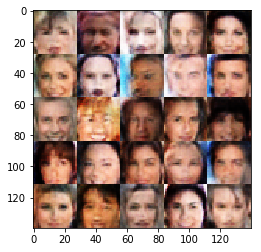

Step: 4210... Epoch 1/1... Discriminator loss: 1.0533... Generator loss: 1.1096
Step: 4220... Epoch 1/1... Discriminator loss: 0.9124... Generator loss: 1.1464
Step: 4230... Epoch 1/1... Discriminator loss: 1.0065... Generator loss: 1.3033
Step: 4240... Epoch 1/1... Discriminator loss: 0.9902... Generator loss: 0.8676
Step: 4250... Epoch 1/1... Discriminator loss: 0.7347... Generator loss: 1.7265
Step: 4260... Epoch 1/1... Discriminator loss: 1.1206... Generator loss: 0.7687
Step: 4270... Epoch 1/1... Discriminator loss: 0.8882... Generator loss: 1.5589
Step: 4280... Epoch 1/1... Discriminator loss: 0.9898... Generator loss: 0.8900
Step: 4290... Epoch 1/1... Discriminator loss: 1.1141... Generator loss: 0.9208
Step: 4300... Epoch 1/1... Discriminator loss: 1.1713... Generator loss: 0.6942


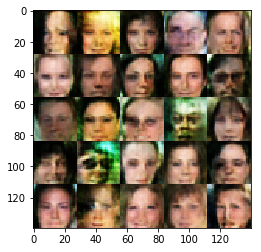

Step: 4310... Epoch 1/1... Discriminator loss: 0.6908... Generator loss: 1.6119
Step: 4320... Epoch 1/1... Discriminator loss: 1.0504... Generator loss: 0.9183
Step: 4330... Epoch 1/1... Discriminator loss: 1.0328... Generator loss: 1.5148
Step: 4340... Epoch 1/1... Discriminator loss: 1.1726... Generator loss: 0.6545
Step: 4350... Epoch 1/1... Discriminator loss: 1.2163... Generator loss: 0.8520
Step: 4360... Epoch 1/1... Discriminator loss: 1.1943... Generator loss: 0.6287
Step: 4370... Epoch 1/1... Discriminator loss: 1.3157... Generator loss: 0.6883
Step: 4380... Epoch 1/1... Discriminator loss: 0.9947... Generator loss: 1.4442
Step: 4390... Epoch 1/1... Discriminator loss: 1.1835... Generator loss: 0.6807
Step: 4400... Epoch 1/1... Discriminator loss: 1.0638... Generator loss: 0.8372


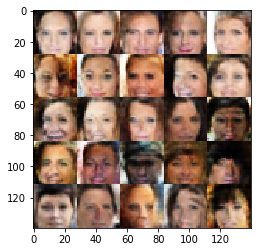

Step: 4410... Epoch 1/1... Discriminator loss: 1.3346... Generator loss: 0.5512
Step: 4420... Epoch 1/1... Discriminator loss: 1.1141... Generator loss: 1.2969
Step: 4430... Epoch 1/1... Discriminator loss: 0.9740... Generator loss: 1.1762
Step: 4440... Epoch 1/1... Discriminator loss: 0.8967... Generator loss: 1.0578
Step: 4450... Epoch 1/1... Discriminator loss: 1.2143... Generator loss: 0.7563
Step: 4460... Epoch 1/1... Discriminator loss: 1.3029... Generator loss: 0.7666
Step: 4470... Epoch 1/1... Discriminator loss: 0.7677... Generator loss: 1.3831
Step: 4480... Epoch 1/1... Discriminator loss: 1.1231... Generator loss: 0.7160
Step: 4490... Epoch 1/1... Discriminator loss: 1.3213... Generator loss: 0.7101
Step: 4500... Epoch 1/1... Discriminator loss: 0.8906... Generator loss: 1.1763


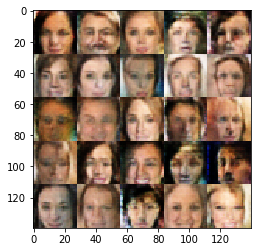

Step: 4510... Epoch 1/1... Discriminator loss: 0.8976... Generator loss: 1.1002
Step: 4520... Epoch 1/1... Discriminator loss: 1.0175... Generator loss: 1.0867
Step: 4530... Epoch 1/1... Discriminator loss: 1.1452... Generator loss: 0.7792
Step: 4540... Epoch 1/1... Discriminator loss: 1.2218... Generator loss: 1.0172
Step: 4550... Epoch 1/1... Discriminator loss: 0.8699... Generator loss: 1.5952
Step: 4560... Epoch 1/1... Discriminator loss: 1.2729... Generator loss: 0.7684
Step: 4570... Epoch 1/1... Discriminator loss: 0.6993... Generator loss: 1.4795
Step: 4580... Epoch 1/1... Discriminator loss: 0.8853... Generator loss: 1.3065
Step: 4590... Epoch 1/1... Discriminator loss: 0.7509... Generator loss: 1.6382
Step: 4600... Epoch 1/1... Discriminator loss: 1.0700... Generator loss: 0.8465


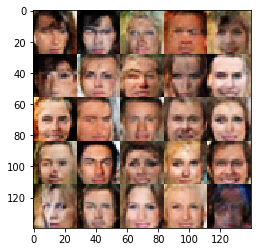

Step: 4610... Epoch 1/1... Discriminator loss: 1.3344... Generator loss: 0.5680
Step: 4620... Epoch 1/1... Discriminator loss: 0.8222... Generator loss: 1.4553
Step: 4630... Epoch 1/1... Discriminator loss: 0.9639... Generator loss: 1.0333
Step: 4640... Epoch 1/1... Discriminator loss: 1.1878... Generator loss: 0.6464
Step: 4650... Epoch 1/1... Discriminator loss: 0.8864... Generator loss: 1.3194
Step: 4660... Epoch 1/1... Discriminator loss: 1.6194... Generator loss: 0.3836
Step: 4670... Epoch 1/1... Discriminator loss: 0.9158... Generator loss: 1.4509
Step: 4680... Epoch 1/1... Discriminator loss: 1.0457... Generator loss: 0.8183
Step: 4690... Epoch 1/1... Discriminator loss: 1.8312... Generator loss: 0.3980
Step: 4700... Epoch 1/1... Discriminator loss: 1.4202... Generator loss: 0.5419


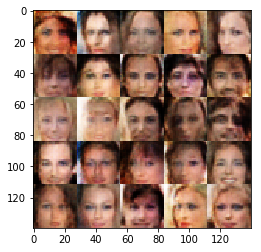

Step: 4710... Epoch 1/1... Discriminator loss: 0.8122... Generator loss: 1.3862
Step: 4720... Epoch 1/1... Discriminator loss: 1.0773... Generator loss: 1.0893
Step: 4730... Epoch 1/1... Discriminator loss: 1.0542... Generator loss: 0.8414
Step: 4740... Epoch 1/1... Discriminator loss: 0.9626... Generator loss: 1.3033
Step: 4750... Epoch 1/1... Discriminator loss: 1.0041... Generator loss: 1.0828
Step: 4760... Epoch 1/1... Discriminator loss: 1.1588... Generator loss: 0.7708
Step: 4770... Epoch 1/1... Discriminator loss: 1.0858... Generator loss: 1.0905
Step: 4780... Epoch 1/1... Discriminator loss: 1.0834... Generator loss: 1.1575
Step: 4790... Epoch 1/1... Discriminator loss: 0.9340... Generator loss: 1.2711
Step: 4800... Epoch 1/1... Discriminator loss: 0.8813... Generator loss: 1.1311


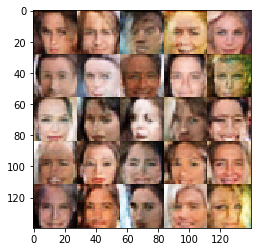

Step: 4810... Epoch 1/1... Discriminator loss: 1.4295... Generator loss: 0.5569
Step: 4820... Epoch 1/1... Discriminator loss: 0.8936... Generator loss: 1.1411
Step: 4830... Epoch 1/1... Discriminator loss: 1.1589... Generator loss: 0.8844
Step: 4840... Epoch 1/1... Discriminator loss: 1.1323... Generator loss: 0.8819
Step: 4850... Epoch 1/1... Discriminator loss: 1.1197... Generator loss: 0.8588
Step: 4860... Epoch 1/1... Discriminator loss: 1.1038... Generator loss: 0.9191
Step: 4870... Epoch 1/1... Discriminator loss: 1.1821... Generator loss: 0.7403
Step: 4880... Epoch 1/1... Discriminator loss: 0.7756... Generator loss: 1.4651
Step: 4890... Epoch 1/1... Discriminator loss: 0.9647... Generator loss: 1.0659
Step: 4900... Epoch 1/1... Discriminator loss: 0.9946... Generator loss: 0.9862


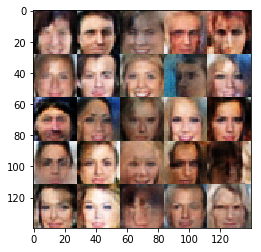

Step: 4910... Epoch 1/1... Discriminator loss: 1.4774... Generator loss: 0.4935
Step: 4920... Epoch 1/1... Discriminator loss: 1.2162... Generator loss: 0.8399
Step: 4930... Epoch 1/1... Discriminator loss: 1.0612... Generator loss: 0.8825
Step: 4940... Epoch 1/1... Discriminator loss: 1.0821... Generator loss: 1.0397
Step: 4950... Epoch 1/1... Discriminator loss: 0.9827... Generator loss: 1.2867
Step: 4960... Epoch 1/1... Discriminator loss: 0.9901... Generator loss: 1.0355
Step: 4970... Epoch 1/1... Discriminator loss: 1.2663... Generator loss: 0.5983
Step: 4980... Epoch 1/1... Discriminator loss: 0.9622... Generator loss: 1.0060
Step: 4990... Epoch 1/1... Discriminator loss: 1.0965... Generator loss: 0.8438
Step: 5000... Epoch 1/1... Discriminator loss: 1.0573... Generator loss: 0.9186


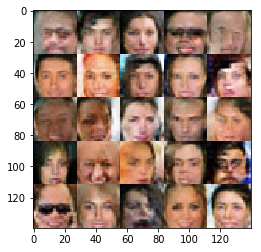

Step: 5010... Epoch 1/1... Discriminator loss: 0.9831... Generator loss: 1.0631
Step: 5020... Epoch 1/1... Discriminator loss: 1.1166... Generator loss: 0.8977
Step: 5030... Epoch 1/1... Discriminator loss: 0.8844... Generator loss: 1.2690
Step: 5040... Epoch 1/1... Discriminator loss: 0.9767... Generator loss: 1.6375
Step: 5050... Epoch 1/1... Discriminator loss: 1.0416... Generator loss: 1.2372
Step: 5060... Epoch 1/1... Discriminator loss: 0.8919... Generator loss: 1.0861
Step: 5070... Epoch 1/1... Discriminator loss: 0.9635... Generator loss: 1.3092
Step: 5080... Epoch 1/1... Discriminator loss: 0.9667... Generator loss: 1.1670
Step: 5090... Epoch 1/1... Discriminator loss: 1.3237... Generator loss: 0.6400
Step: 5100... Epoch 1/1... Discriminator loss: 1.8381... Generator loss: 2.0274


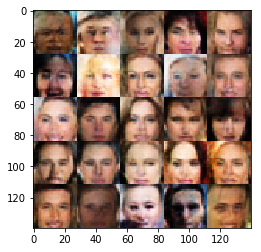

Step: 5110... Epoch 1/1... Discriminator loss: 1.3401... Generator loss: 0.5450
Step: 5120... Epoch 1/1... Discriminator loss: 1.1716... Generator loss: 0.8987
Step: 5130... Epoch 1/1... Discriminator loss: 1.0799... Generator loss: 0.9867
Step: 5140... Epoch 1/1... Discriminator loss: 1.2614... Generator loss: 1.1819
Step: 5150... Epoch 1/1... Discriminator loss: 1.2326... Generator loss: 0.6655
Step: 5160... Epoch 1/1... Discriminator loss: 0.9963... Generator loss: 1.2084
Step: 5170... Epoch 1/1... Discriminator loss: 1.0475... Generator loss: 0.9276
Step: 5180... Epoch 1/1... Discriminator loss: 0.9834... Generator loss: 0.9818
Step: 5190... Epoch 1/1... Discriminator loss: 1.0484... Generator loss: 0.8963
Step: 5200... Epoch 1/1... Discriminator loss: 0.9931... Generator loss: 1.0826


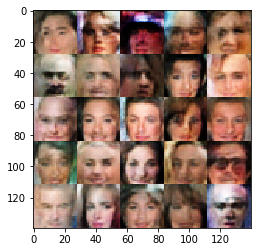

Step: 5210... Epoch 1/1... Discriminator loss: 1.1821... Generator loss: 0.9647
Step: 5220... Epoch 1/1... Discriminator loss: 0.8802... Generator loss: 1.6763
Step: 5230... Epoch 1/1... Discriminator loss: 1.4179... Generator loss: 0.5175
Step: 5240... Epoch 1/1... Discriminator loss: 1.2597... Generator loss: 0.6772
Step: 5250... Epoch 1/1... Discriminator loss: 1.0896... Generator loss: 0.9234
Step: 5260... Epoch 1/1... Discriminator loss: 1.1821... Generator loss: 0.7489
Step: 5270... Epoch 1/1... Discriminator loss: 0.7121... Generator loss: 1.4938
Step: 5280... Epoch 1/1... Discriminator loss: 1.4281... Generator loss: 0.5162
Step: 5290... Epoch 1/1... Discriminator loss: 1.2846... Generator loss: 0.6003
Step: 5300... Epoch 1/1... Discriminator loss: 0.9906... Generator loss: 1.1795


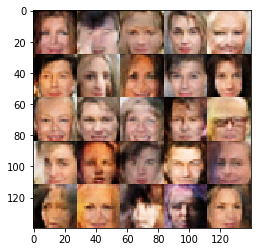

Step: 5310... Epoch 1/1... Discriminator loss: 1.3935... Generator loss: 0.6317
Step: 5320... Epoch 1/1... Discriminator loss: 1.0794... Generator loss: 0.9005
Step: 5330... Epoch 1/1... Discriminator loss: 1.0763... Generator loss: 0.8688
Step: 5340... Epoch 1/1... Discriminator loss: 1.4737... Generator loss: 0.4381
Step: 5350... Epoch 1/1... Discriminator loss: 1.0075... Generator loss: 1.1388
Step: 5360... Epoch 1/1... Discriminator loss: 0.9438... Generator loss: 0.9561
Step: 5370... Epoch 1/1... Discriminator loss: 0.9161... Generator loss: 1.4669
Step: 5380... Epoch 1/1... Discriminator loss: 1.1977... Generator loss: 1.5982
Step: 5390... Epoch 1/1... Discriminator loss: 0.9529... Generator loss: 1.1779
Step: 5400... Epoch 1/1... Discriminator loss: 1.1242... Generator loss: 0.6896


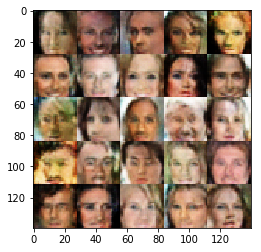

Step: 5410... Epoch 1/1... Discriminator loss: 1.0881... Generator loss: 0.9304
Step: 5420... Epoch 1/1... Discriminator loss: 0.9572... Generator loss: 1.4675
Step: 5430... Epoch 1/1... Discriminator loss: 1.0688... Generator loss: 1.0183
Step: 5440... Epoch 1/1... Discriminator loss: 1.2333... Generator loss: 1.0121
Step: 5450... Epoch 1/1... Discriminator loss: 1.2442... Generator loss: 0.7606
Step: 5460... Epoch 1/1... Discriminator loss: 1.2457... Generator loss: 0.7219
Step: 5470... Epoch 1/1... Discriminator loss: 0.9538... Generator loss: 0.9493
Step: 5480... Epoch 1/1... Discriminator loss: 1.3956... Generator loss: 0.6397
Step: 5490... Epoch 1/1... Discriminator loss: 1.0589... Generator loss: 0.9449
Step: 5500... Epoch 1/1... Discriminator loss: 1.3957... Generator loss: 0.8279


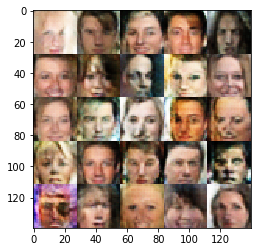

Step: 5510... Epoch 1/1... Discriminator loss: 1.3685... Generator loss: 0.5079
Step: 5520... Epoch 1/1... Discriminator loss: 1.0751... Generator loss: 1.0701
Step: 5530... Epoch 1/1... Discriminator loss: 1.2119... Generator loss: 0.8292
Step: 5540... Epoch 1/1... Discriminator loss: 1.1035... Generator loss: 0.7469
Step: 5550... Epoch 1/1... Discriminator loss: 1.2786... Generator loss: 0.6147
Step: 5560... Epoch 1/1... Discriminator loss: 1.1356... Generator loss: 1.0230
Step: 5570... Epoch 1/1... Discriminator loss: 1.1646... Generator loss: 0.7214
Step: 5580... Epoch 1/1... Discriminator loss: 1.0881... Generator loss: 1.0335
Step: 5590... Epoch 1/1... Discriminator loss: 0.9417... Generator loss: 0.9512
Step: 5600... Epoch 1/1... Discriminator loss: 1.2372... Generator loss: 0.9159


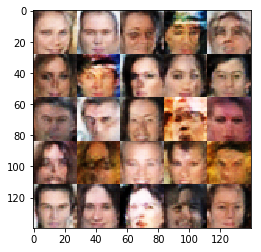

Step: 5610... Epoch 1/1... Discriminator loss: 1.4598... Generator loss: 0.4626
Step: 5620... Epoch 1/1... Discriminator loss: 1.5687... Generator loss: 0.3989
Step: 5630... Epoch 1/1... Discriminator loss: 1.1795... Generator loss: 0.7769
Step: 5640... Epoch 1/1... Discriminator loss: 1.0271... Generator loss: 1.3108
Step: 5650... Epoch 1/1... Discriminator loss: 0.9874... Generator loss: 0.9264
Step: 5660... Epoch 1/1... Discriminator loss: 1.1517... Generator loss: 0.6593
Step: 5670... Epoch 1/1... Discriminator loss: 0.8820... Generator loss: 1.4956
Step: 5680... Epoch 1/1... Discriminator loss: 1.0721... Generator loss: 1.1322
Step: 5690... Epoch 1/1... Discriminator loss: 1.1782... Generator loss: 0.7511
Step: 5700... Epoch 1/1... Discriminator loss: 1.0334... Generator loss: 0.8940


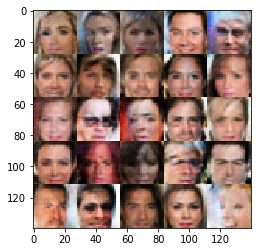

Step: 5710... Epoch 1/1... Discriminator loss: 0.8755... Generator loss: 1.3105
Step: 5720... Epoch 1/1... Discriminator loss: 0.9029... Generator loss: 1.1526
Step: 5730... Epoch 1/1... Discriminator loss: 1.1333... Generator loss: 0.7549
Step: 5740... Epoch 1/1... Discriminator loss: 1.1524... Generator loss: 0.7071
Step: 5750... Epoch 1/1... Discriminator loss: 1.1567... Generator loss: 0.8220
Step: 5760... Epoch 1/1... Discriminator loss: 1.5017... Generator loss: 0.4468
Step: 5770... Epoch 1/1... Discriminator loss: 0.9167... Generator loss: 1.0659
Step: 5780... Epoch 1/1... Discriminator loss: 1.0237... Generator loss: 1.5675
Step: 5790... Epoch 1/1... Discriminator loss: 1.1991... Generator loss: 0.6949
Step: 5800... Epoch 1/1... Discriminator loss: 1.0868... Generator loss: 0.8970


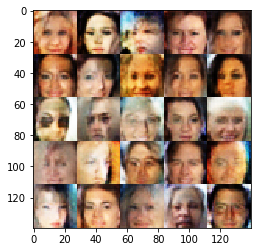

Step: 5810... Epoch 1/1... Discriminator loss: 1.1311... Generator loss: 0.9164
Step: 5820... Epoch 1/1... Discriminator loss: 1.1000... Generator loss: 0.8902
Step: 5830... Epoch 1/1... Discriminator loss: 0.9097... Generator loss: 1.0932
Step: 5840... Epoch 1/1... Discriminator loss: 0.8859... Generator loss: 1.0997
Step: 5850... Epoch 1/1... Discriminator loss: 1.0138... Generator loss: 0.8928
Step: 5860... Epoch 1/1... Discriminator loss: 1.0942... Generator loss: 0.9594
Step: 5870... Epoch 1/1... Discriminator loss: 0.9865... Generator loss: 1.0096
Step: 5880... Epoch 1/1... Discriminator loss: 1.2600... Generator loss: 0.6769
Step: 5890... Epoch 1/1... Discriminator loss: 1.0804... Generator loss: 0.7429
Step: 5900... Epoch 1/1... Discriminator loss: 1.0295... Generator loss: 1.2725


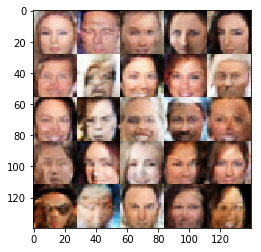

Step: 5910... Epoch 1/1... Discriminator loss: 0.8799... Generator loss: 1.1464
Step: 5920... Epoch 1/1... Discriminator loss: 0.7227... Generator loss: 1.6634
Step: 5930... Epoch 1/1... Discriminator loss: 0.9325... Generator loss: 0.9881
Step: 5940... Epoch 1/1... Discriminator loss: 0.7837... Generator loss: 1.2980
Step: 5950... Epoch 1/1... Discriminator loss: 1.4430... Generator loss: 0.5383
Step: 5960... Epoch 1/1... Discriminator loss: 1.1144... Generator loss: 0.9020
Step: 5970... Epoch 1/1... Discriminator loss: 1.5160... Generator loss: 1.1226
Step: 5980... Epoch 1/1... Discriminator loss: 1.1483... Generator loss: 0.7910
Step: 5990... Epoch 1/1... Discriminator loss: 1.1700... Generator loss: 0.7572
Step: 6000... Epoch 1/1... Discriminator loss: 1.4332... Generator loss: 0.7422


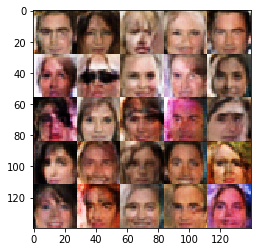

Step: 6010... Epoch 1/1... Discriminator loss: 1.2878... Generator loss: 0.6094
Step: 6020... Epoch 1/1... Discriminator loss: 0.9667... Generator loss: 1.1457
Step: 6030... Epoch 1/1... Discriminator loss: 1.0976... Generator loss: 0.7718
Step: 6040... Epoch 1/1... Discriminator loss: 0.9986... Generator loss: 0.9321
Step: 6050... Epoch 1/1... Discriminator loss: 0.9683... Generator loss: 1.0535
Step: 6060... Epoch 1/1... Discriminator loss: 1.2338... Generator loss: 1.0561
Step: 6070... Epoch 1/1... Discriminator loss: 0.9734... Generator loss: 1.0691
Step: 6080... Epoch 1/1... Discriminator loss: 1.4847... Generator loss: 0.4652
Step: 6090... Epoch 1/1... Discriminator loss: 1.1369... Generator loss: 0.8081
Step: 6100... Epoch 1/1... Discriminator loss: 1.1293... Generator loss: 0.9955


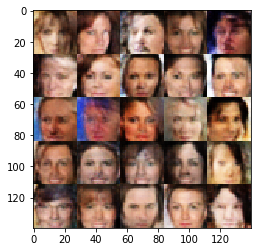

Step: 6110... Epoch 1/1... Discriminator loss: 1.2118... Generator loss: 0.6646
Step: 6120... Epoch 1/1... Discriminator loss: 1.0284... Generator loss: 1.2889
Step: 6130... Epoch 1/1... Discriminator loss: 1.0361... Generator loss: 1.0620
Step: 6140... Epoch 1/1... Discriminator loss: 1.1615... Generator loss: 0.6993
Step: 6150... Epoch 1/1... Discriminator loss: 1.1272... Generator loss: 0.7485
Step: 6160... Epoch 1/1... Discriminator loss: 1.0142... Generator loss: 0.9537
Step: 6170... Epoch 1/1... Discriminator loss: 1.0745... Generator loss: 0.8916
Step: 6180... Epoch 1/1... Discriminator loss: 1.3673... Generator loss: 1.3620
Step: 6190... Epoch 1/1... Discriminator loss: 1.0004... Generator loss: 1.0220
Step: 6200... Epoch 1/1... Discriminator loss: 1.1705... Generator loss: 0.9081


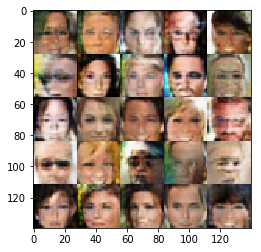

Step: 6210... Epoch 1/1... Discriminator loss: 1.4294... Generator loss: 0.5194
Step: 6220... Epoch 1/1... Discriminator loss: 1.2736... Generator loss: 0.7045
Step: 6230... Epoch 1/1... Discriminator loss: 1.3673... Generator loss: 0.5934
Step: 6240... Epoch 1/1... Discriminator loss: 0.8928... Generator loss: 1.2138
Step: 6250... Epoch 1/1... Discriminator loss: 1.1271... Generator loss: 1.4881
Step: 6260... Epoch 1/1... Discriminator loss: 0.9947... Generator loss: 0.8611
Step: 6270... Epoch 1/1... Discriminator loss: 0.9544... Generator loss: 1.0051
Step: 6280... Epoch 1/1... Discriminator loss: 1.0300... Generator loss: 1.0856
Step: 6290... Epoch 1/1... Discriminator loss: 1.2817... Generator loss: 0.6198
Step: 6300... Epoch 1/1... Discriminator loss: 1.1794... Generator loss: 0.8187


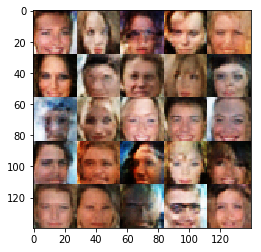

Step: 6310... Epoch 1/1... Discriminator loss: 0.8290... Generator loss: 1.6850
Step: 6320... Epoch 1/1... Discriminator loss: 1.1279... Generator loss: 0.8995
Step: 6330... Epoch 1/1... Discriminator loss: 1.1456... Generator loss: 0.8692


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.